The goal of this exercise is to practice data cleaning, analysis and visualization skills using Python Pandas, Numpy and Matplotlib. We'll first import the dataset, then perform some processing with it to make it a bit more cleaner, and we're using the clean version to get some insights. After that, we will generate some trend charts at the end.

Following are the steps that we'll perform:

1. [Data Preprocessing](#1.-Data-Preprocessing)
2. [Data Analysis](#2.-Data-Analysis)
3. [Data Visualization](#3.-Data-Visualization)


The dataset [Monthly Average Retail Prices](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000201&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=2012&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2021&referencePeriods=20120101%2C20211201) consists of monthly average retail prices for food and some essentials between 2012 and 2021.


### 1. Data Preprocessing
Let's do some data preprocessing first

In [1326]:
import pandas as pd

# Import dataset
raw_df = pd.read_table("data/monthly_average_product_price.csv", header = None)
# raw_df = pd.read_csv("data/monthly_average_product_price.csv", on_bad_lines='skip')
raw_df

,0
0,Monthly average retail prices for food and oth...
1,Frequency: Monthly
2,Table: 18-10-0002-01 (formerly CANSIM 326-0012)
3,Release date: 2022-03-16
4,Geography: Canada
...,...
68,"3,""Effective May 2018 reference month for the ..."
69,"4,""Beginning May 4, 2022, national average pri..."
70,"5,""Average prices are derived for products as ..."
71,How to cite: Statistics Canada. Table 18-10-00...


In [1327]:
raw_df.head(10)

# Drop unwanted data
raw_df.drop(raw_df.index[:8], inplace=True)
raw_df.reset_index(drop=True, inplace=True)

raw_df.head(10)

,0
0,"Products 5,""January 2012"",""February 2012"",""Mar..."
1,",""Dollars"",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,"Round steak, 1 kilogram,""13.90"",""13.91"",""14.10..."
3,"Sirloin steak, 1 kilogram,""17.22"",""17.17"",""17...."
4,"Prime rib roast, 1 kilogram,""23.14"",""22.41"",""2..."
5,"Blade roast, 1 kilogram,""11.00"",""11.29"",""11.26..."
6,"Stewing beef, 1 kilogram,""10.65"",""10.75"",""11.0..."
7,"Ground beef, 1 kilogram,""8.85"",""8.92"",""8.82"",""..."
8,"Pork chops, 1 kilogram,""10.09"",""10.46"",""10.54""..."
9,"Chicken, 1 kilogram,""7.09"",""6.92"",""6.92"",""7.07..."


In [1328]:
raw_df.drop(raw_df.index[1], inplace=True)
raw_df.reset_index(drop=True, inplace=True)
raw_df

,0
0,"Products 5,""January 2012"",""February 2012"",""Mar..."
1,"Round steak, 1 kilogram,""13.90"",""13.91"",""14.10..."
2,"Sirloin steak, 1 kilogram,""17.22"",""17.17"",""17...."
3,"Prime rib roast, 1 kilogram,""23.14"",""22.41"",""2..."
4,"Blade roast, 1 kilogram,""11.00"",""11.29"",""11.26..."
...,...
59,"3,""Effective May 2018 reference month for the ..."
60,"4,""Beginning May 4, 2022, national average pri..."
61,"5,""Average prices are derived for products as ..."
62,How to cite: Statistics Canada. Table 18-10-00...


In [1329]:
raw_df.tail(15)

,0
49,"Deodorant, 60 grams,""4.63"",""4.47"",""4.43"",""4.38..."
50,"Toothpaste, 100 millilitres,""2.45"",""2.40"",""2.4..."
51,"Cigarettes (200),""84.06"",""84.13"",""84.83"",""84.7..."
52,",""Cents per litre"",,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
53,"Regular, unleaded gasoline at self-service sta..."
54,Symbol legend:
55,".., not available for a specific reference period"
56,Footnotes:
57,"1,""Prices for these items are collected as par..."
58,"2,""For concepts and definitions, see publicati..."


In [1330]:
raw_df.drop(raw_df.index[52:], inplace=True)
raw_df.tail(5)

,0
47,"Bathroom tissue (4 rolls),""2.52"",""2.54"",""2.50""..."
48,"Shampoo, 300 millilitres,""4.04"",""4.04"",""3.97"",..."
49,"Deodorant, 60 grams,""4.63"",""4.47"",""4.43"",""4.38..."
50,"Toothpaste, 100 millilitres,""2.45"",""2.40"",""2.4..."
51,"Cigarettes (200),""84.06"",""84.13"",""84.83"",""84.7..."


In [1331]:
# split column into multiple columns by delimiter 
# French fried potatoes
raw_df = raw_df[0].str.split(',"', expand=True)
raw_df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,"January 2012""","February 2012""","March 2012""","April 2012""","May 2012""","June 2012""","July 2012""","August 2012""","September 2012""",...,"March 2021""","April 2021""","May 2021""","June 2021""","July 2021""","August 2021""","September 2021""","October 2021""","November 2021""","December 2021"""
1,"Round steak, 1 kilogram","13.90""","13.91""","14.10""","14.11""","14.32""","14.09""","14.18""","14.31""","14.20""",...,"17.97""","17.94""","18.53""","18.71""","19.05""","19.23""","20.01""","20.34""","19.77""","19.66"""
2,"Sirloin steak, 1 kilogram","17.22""","17.17""","17.43""","17.67""","17.23""","17.13""","17.31""","17.76""","17.52""",...,"23.03""","23.60""","23.38""","24.34""","25.22""","25.33""","24.98""","26.45""","25.69""","25.94"""
3,"Prime rib roast, 1 kilogram","23.14""","22.41""","23.57""","21.51""","23.82""","23.98""","23.96""","23.74""","24.36""",...,"36.66""","36.08""","38.60""","39.80""","41.39""","39.26""","43.02""","43.35""","44.82""","42.30"""
4,"Blade roast, 1 kilogram","11.00""","11.29""","11.26""","11.29""","11.16""","11.20""","11.36""","11.34""","11.19""",...,"15.49""","17.07""","17.62""","17.96""","17.98""","18.20""","19.83""","18.52""","19.46""","18.04"""
5,"Stewing beef, 1 kilogram","10.65""","10.75""","11.05""","11.13""","11.34""","11.33""","11.34""","11.35""","11.00""",...,"15.40""","15.88""","16.96""","17.26""","17.41""","17.54""","18.56""","18.67""","19.17""","18.55"""
6,"Ground beef, 1 kilogram","8.85""","8.92""","8.82""","8.88""","9.02""","9.24""","9.18""","9.10""","9.02""",...,"11.22""","11.53""","11.28""","11.00""","11.31""","11.56""","11.86""","12.31""","12.46""","12.06"""
7,"Pork chops, 1 kilogram","10.09""","10.46""","10.54""","10.91""","10.70""","10.37""","10.65""","10.81""","10.53""",...,"11.48""","11.80""","11.60""","12.09""","12.22""","12.53""","12.42""","12.43""","11.97""","12.75"""
8,"Chicken, 1 kilogram","7.09""","6.92""","6.92""","7.07""","7.05""","7.04""","7.09""","6.90""","6.95""",...,"7.73""","7.87""","7.76""","7.72""","8.07""","8.13""","8.30""","8.51""","8.18""","7.87"""
9,"Bacon, 500 grams","5.01""","5.20""","5.12""","5.13""","5.13""","5.08""","5.15""","5.14""","5.18""",...,"7.29""","7.69""","7.89""","7.79""","7.99""","8.24""","8.27""","8.29""","8.47""","8.66"""


In [1332]:
df = raw_df.replace('"','', regex=True)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
2,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
3,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
4,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
5,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
6,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
7,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
8,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
9,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66


In [1333]:
columns = df.iloc[0].tolist()
columns[0] = 'Products'
columns

['Products',
 'January 2012',
 'February 2012',
 'March 2012',
 'April 2012',
 'May 2012',
 'June 2012',
 'July 2012',
 'August 2012',
 'September 2012',
 'October 2012',
 'November 2012',
 'December 2012',
 'January 2013',
 'February 2013',
 'March 2013',
 'April 2013',
 'May 2013',
 'June 2013',
 'July 2013',
 'August 2013',
 'September 2013',
 'October 2013',
 'November 2013',
 'December 2013',
 'January 2014',
 'February 2014',
 'March 2014',
 'April 2014',
 'May 2014',
 'June 2014',
 'July 2014',
 'August 2014',
 'September 2014',
 'October 2014',
 'November 2014',
 'December 2014',
 'January 2015',
 'February 2015',
 'March 2015',
 'April 2015',
 'May 2015',
 'June 2015',
 'July 2015',
 'August 2015',
 'September 2015',
 'October 2015',
 'November 2015',
 'December 2015',
 'January 2016',
 'February 2016',
 'March 2016',
 'April 2016',
 'May 2016',
 'June 2016',
 'July 2016',
 'August 2016',
 'September 2016',
 'October 2016',
 'November 2016',
 'December 2016',
 'January 2017',


In [1334]:
# Grab the first row as the header
df.columns = columns

# # Take the data less the header row
df = df[1:]

df.reset_index(drop=True, inplace=True)
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [1335]:
# df.info()
# df['January 2012'].dtypes
# Data type "Object" represents strings

# df['December 2021'] = df['January 2012'].astype(float)
# df['January 2012'].dtypes


# Drop the products column (contain string value)
products = df['Products']
df = df.drop(['Products'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 120 entries, January 2012 to December 2021
dtypes: object(120)
memory usage: 47.9+ KB


In [1336]:
df = df.apply(pd.to_numeric, errors='coerce') 
# coerce->invalid parsing will be set as NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 120 entries, January 2012 to December 2021
dtypes: float64(120)
memory usage: 47.9 KB


In [1337]:
# Add products column back
df.insert(loc=0, column='Products', value=products)
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [1338]:
import numpy as np
np.where(pd.isnull(df))

(array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45]))

In [1339]:
df.drop(df.index[11:13], inplace=True)
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [1340]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [1341]:
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


### 2. Data Analysis
Now we're pretty much all set. Let's get some insights from the dataset
#### 1. Calculate the CPI in 2021(Consumer price index)
Formula:

CPI_t = (C_t/C_0)*100

CPI_t = consumer price index in current period

C_t	= cost of market basket in current period

C_0	= cost of market basket in base period

Cost of market basket = Total Expenditure

Total Expenditure = Sum the **Product Price** x **Quantity** in each year

e.g.:

Year 2020 Product A price: 25, Quantity: 1 kg

Year 2020 Product B price: 20, Quantity: 2 kg

Assume that the market basket (the amount purchased) is the quantity provided in the dataset.

Total expenditure in 2020 = (25 * 1) + (20 * 2) = 65

---
We're taking 2012 as base year, hence we can calculate the CPI 2021 by following:

**CPI 2021 = (Total Expenditure in 2021/Total Expenditure in 2012)*100**

The product price provided in the dataset is by month, not by year. Let's get the **mean** of total expenditure of each year:

#### a. Get the mean of total expenditure in 2012 and 2021:

In [1342]:
# Get the average price of the year
year_2012 = df.columns[1:13]
year_2021 = df.columns[109:]

average_price_2012 = df[year_2012].mean(axis=1)
average_price_2012 = round(average_price_2012, 2) # only get 2 decimal places

average_price_2021 = df[year_2021].mean(axis=1)
average_price_2021 = round(average_price_2021, 2)
average_price_2012

0     14.13
1     17.29
2     23.40
3     11.29
4     11.05
5      9.06
6     10.61
7      6.99
8      5.13
9      3.51
10     3.66
13     4.39
14     2.81
15     1.88
16     3.15
17     2.77
18     2.71
19     1.46
20     5.18
21     4.97
22     3.60
23     1.70
24     2.77
25     2.12
26     3.95
27     1.71
28     7.98
29     1.55
30     5.38
31     2.43
32     1.22
33     1.54
34     2.36
35     3.30
36     3.17
37     6.06
38     6.53
39     4.33
40     4.14
41     1.03
42     0.84
43     3.79
44     2.60
45     2.26
46     2.60
47     3.96
48     4.49
49     2.44
50    84.49
dtype: float64

In [1343]:
# Create a new DataFrame
data = {'2012 average price': average_price_2012.tolist(),
        '2021 average price': average_price_2021.tolist()}

price_by_year_df = pd.DataFrame(data)
price_by_year_df

,2012 average price,2021 average price
0,14.13,18.91
1,17.29,24.42
2,23.40,39.94
3,11.29,17.80
4,11.05,17.26
5,9.06,11.60
6,10.61,12.08
7,6.99,7.87
8,5.13,7.94
9,3.51,5.03


In [1344]:
price_by_year_df['Products'] = df['Products'].tolist()
price_by_year_df = price_by_year_df.set_index('Products')
price_by_year_df

,2012 average price,2021 average price
Products,,
"Round steak, 1 kilogram",14.13,18.91
"Sirloin steak, 1 kilogram",17.29,24.42
"Prime rib roast, 1 kilogram",23.40,39.94
"Blade roast, 1 kilogram",11.29,17.80
"Stewing beef, 1 kilogram",11.05,17.26
"Ground beef, 1 kilogram",9.06,11.60
"Pork chops, 1 kilogram",10.61,12.08
"Chicken, 1 kilogram",6.99,7.87
"Bacon, 500 grams",5.13,7.94


Get Total Expenditure in 2012 & 2021:

(Total Expenditure = price * quantity) 

Assuming quantity is the unit provided in the dataset

In [1345]:
# Sum the price
total = price_by_year_df.sum()

price_by_year_df.loc['Total'] = total
price_by_year_df

,2012 average price,2021 average price
Products,,
"Round steak, 1 kilogram",14.13,18.91
"Sirloin steak, 1 kilogram",17.29,24.42
"Prime rib roast, 1 kilogram",23.40,39.94
"Blade roast, 1 kilogram",11.29,17.80
"Stewing beef, 1 kilogram",11.05,17.26
"Ground beef, 1 kilogram",9.06,11.60
"Pork chops, 1 kilogram",10.61,12.08
"Chicken, 1 kilogram",6.99,7.87
"Bacon, 500 grams",5.13,7.94


In [1346]:
# Get the CPI in 2012: (expenditure_2012/expenditure_2012)*100
expenditure_2012 = price_by_year_df['2012 average price']['Total']
CPI_2012 = (expenditure_2012/expenditure_2012)*100
CPI_2012

100.0

In [1347]:
# Get the CPI in 2021: (expenditure_2021/expenditure_2012)*100
expenditure_2021 = price_by_year_df['2021 average price']['Total']
CPI_2021 = (expenditure_2021/expenditure_2012)*100
CPI_2021

138.15122896991684

#### 2. Calculate the Inflation Rate between 2012 and 2021

Formula: 

**Inflation Rate** = (Current CPI - Previous CPI)/Previous CPI x 100
 
In this case, **Inflation Rate** will be: **(CPI_2021-CPI_2012)/CPI_2012 * 100**

In [1348]:
inflation_rate = (CPI_2021-CPI_2012)/CPI_2012*100
inflation_rate = round(inflation_rate, 2)
print(f"Inflation rate: {inflation_rate}%")

Inflation rate: 38.15%


### 3. Data Visualization
1. Plot the entire dataset.
Create a simple line chart from the dataset, set the **timeline (Years and Months)** on **x-axis** and the **Product Price** on **y-axis**.
2. Plot specific products

In [1349]:
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


If we are ploting the entire dataset, that will be too many data points. Because we have a total of 10 (years) x each year 12 months = **120** values on x-axis. It would make sence to use the **year** for x-axis (The datset has 10 years) so for our x-axis, we will have 10 values, which is the year from 2012 to 2021.

We are going to create a new dataframe for that. The **columns** will be the **years**, the **row index** stays with the **products**.

So again, we are getting the mean(the average product price of each year)

In [1350]:
import numpy as np
columns = df.columns.to_numpy()
all_columns = np.array_split(columns, 10)

# Drop Products in the first array
all_columns[0] = np.delete(all_columns[0], 0)
all_columns

[array(['January 2012', 'February 2012', 'March 2012', 'April 2012',
        'May 2012', 'June 2012', 'July 2012', 'August 2012',
        'September 2012', 'October 2012', 'November 2012', 'December 2012'],
       dtype=object),
 array(['January 2013', 'February 2013', 'March 2013', 'April 2013',
        'May 2013', 'June 2013', 'July 2013', 'August 2013',
        'September 2013', 'October 2013', 'November 2013', 'December 2013'],
       dtype=object),
 array(['January 2014', 'February 2014', 'March 2014', 'April 2014',
        'May 2014', 'June 2014', 'July 2014', 'August 2014',
        'September 2014', 'October 2014', 'November 2014', 'December 2014'],
       dtype=object),
 array(['January 2015', 'February 2015', 'March 2015', 'April 2015',
        'May 2015', 'June 2015', 'July 2015', 'August 2015',
        'September 2015', 'October 2015', 'November 2015', 'December 2015'],
       dtype=object),
 array(['January 2016', 'February 2016', 'March 2016', 'April 2016',
        'May 20

In [1351]:
def get_mean(year):
    return round(df[year].mean(axis=1), 2).tolist()
    
average_price = [get_mean(year) for year in all_columns]
average_price = np.array(average_price)
average_price

array([[ 14.13,  17.29,  23.4 ,  11.29,  11.05,   9.06,  10.61,   6.99,
          5.13,   3.51,   3.66,   4.39,   2.81,   1.88,   3.15,   2.77,
          2.71,   1.46,   5.18,   4.97,   3.6 ,   1.7 ,   2.77,   2.12,
          3.95,   1.71,   7.98,   1.55,   5.38,   2.43,   1.22,   1.54,
          2.36,   3.3 ,   3.17,   6.06,   6.53,   4.33,   4.14,   1.03,
          0.84,   3.79,   2.6 ,   2.26,   2.6 ,   3.96,   4.49,   2.44,
         84.49],
       [ 14.4 ,  17.77,  23.31,  12.01,  11.32,   9.44,  10.87,   7.11,
          5.25,   3.53,   3.94,   4.39,   2.79,   1.87,   3.25,   2.86,
          2.68,   1.39,   5.05,   4.99,   3.88,   1.66,   2.94,   2.11,
          3.99,   1.72,   7.89,   1.83,   5.5 ,   2.43,   1.22,   1.49,
          2.39,   3.3 ,   3.04,   5.88,   6.52,   4.36,   4.1 ,   1.02,
          0.84,   3.63,   2.63,   2.28,   2.6 ,   3.83,   4.38,   2.41,
         86.19],
       [ 16.54,  20.24,  26.54,  14.16,  14.02,  10.94,  12.36,   7.23,
          6.3 ,   3.93,   4.61

In [1352]:
average_price = average_price.transpose()
average_price

array([[ 14.13,  14.4 ,  16.54,  18.86,  18.51,  17.92,  17.82,  17.52,
         18.31,  18.91],
       [ 17.29,  17.77,  20.24,  23.6 ,  23.97,  22.84,  22.47,  22.52,
         23.03,  24.42],
       [ 23.4 ,  23.31,  26.54,  30.04,  31.6 ,  31.31,  30.61,  32.65,
         35.7 ,  39.94],
       [ 11.29,  12.01,  14.16,  16.18,  16.54,  16.19,  16.01,  15.67,
         16.98,  17.8 ],
       [ 11.05,  11.32,  14.02,  16.71,  16.5 ,  16.02,  15.5 ,  15.52,
         16.67,  17.26],
       [  9.06,   9.44,  10.94,  12.65,  12.45,  12.24,  12.03,  11.41,
         11.75,  11.6 ],
       [ 10.61,  10.87,  12.36,  12.96,  12.56,  12.35,  12.14,  11.97,
         11.99,  12.08],
       [  6.99,   7.11,   7.23,   7.61,   7.49,   7.36,   7.39,   7.44,
          7.43,   7.87],
       [  5.13,   5.25,   6.3 ,   6.65,   6.74,   6.87,   6.89,   7.12,
          7.15,   7.94],
       [  3.51,   3.53,   3.93,   4.29,   4.29,   4.35,   4.37,   4.48,
          4.81,   5.03],
       [  3.66,   3.94,   4.61

In [1353]:
df_columns = np.arange(2012, 2022) # years
df_index = df['Products'].tolist()
df = pd.DataFrame(data = average_price, index = df_index, columns = df_columns)
df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
"Round steak, 1 kilogram",14.13,14.40,16.54,18.86,18.51,17.92,17.82,17.52,18.31,18.91
"Sirloin steak, 1 kilogram",17.29,17.77,20.24,23.60,23.97,22.84,22.47,22.52,23.03,24.42
"Prime rib roast, 1 kilogram",23.40,23.31,26.54,30.04,31.60,31.31,30.61,32.65,35.70,39.94
"Blade roast, 1 kilogram",11.29,12.01,14.16,16.18,16.54,16.19,16.01,15.67,16.98,17.80
"Stewing beef, 1 kilogram",11.05,11.32,14.02,16.71,16.50,16.02,15.50,15.52,16.67,17.26
"Ground beef, 1 kilogram",9.06,9.44,10.94,12.65,12.45,12.24,12.03,11.41,11.75,11.60
"Pork chops, 1 kilogram",10.61,10.87,12.36,12.96,12.56,12.35,12.14,11.97,11.99,12.08
"Chicken, 1 kilogram",6.99,7.11,7.23,7.61,7.49,7.36,7.39,7.44,7.43,7.87
"Bacon, 500 grams",5.13,5.25,6.30,6.65,6.74,6.87,6.89,7.12,7.15,7.94
"Wieners, 450 grams",3.51,3.53,3.93,4.29,4.29,4.35,4.37,4.48,4.81,5.03


In [1354]:
# Transpose the dataset
df = df.transpose() 
df

# By default, matplotlib take dataframe's row for x axis value, columns for y axis

,"Round steak, 1 kilogram","Sirloin steak, 1 kilogram","Prime rib roast, 1 kilogram","Blade roast, 1 kilogram","Stewing beef, 1 kilogram","Ground beef, 1 kilogram","Pork chops, 1 kilogram","Chicken, 1 kilogram","Bacon, 500 grams","Wieners, 450 grams",...,"Soup, canned, 284 millilitres","Baby food, 128 millilitres","Peanut butter, 500 grams",Paper towels (2 rolls),Facial tissue (200 tissues),Bathroom tissue (4 rolls),"Shampoo, 300 millilitres","Deodorant, 60 grams","Toothpaste, 100 millilitres",Cigarettes (200)
2012,14.13,17.29,23.40,11.29,11.05,9.06,10.61,6.99,5.13,3.51,...,1.03,0.84,3.79,2.60,2.26,2.60,3.96,4.49,2.44,84.49
2013,14.40,17.77,23.31,12.01,11.32,9.44,10.87,7.11,5.25,3.53,...,1.02,0.84,3.63,2.63,2.28,2.60,3.83,4.38,2.41,86.19
2014,16.54,20.24,26.54,14.16,14.02,10.94,12.36,7.23,6.30,3.93,...,1.01,0.90,3.49,2.61,2.48,2.59,3.83,4.27,2.45,92.33
2015,18.86,23.60,30.04,16.18,16.71,12.65,12.96,7.61,6.65,4.29,...,1.09,0.94,3.61,2.60,2.64,2.63,3.88,4.41,2.49,96.40
2016,18.51,23.97,31.60,16.54,16.50,12.45,12.56,7.49,6.74,4.29,...,1.11,0.95,3.52,2.63,2.74,2.59,3.90,4.50,2.68,101.02
2017,17.92,22.84,31.31,16.19,16.02,12.24,12.35,7.36,6.87,4.35,...,1.13,0.98,3.30,2.69,2.78,2.57,4.01,4.55,2.74,106.08
2018,17.82,22.47,30.61,16.01,15.50,12.03,12.14,7.39,6.89,4.37,...,1.13,1.16,3.14,2.81,3.05,2.66,4.10,4.54,2.84,115.71
2019,17.52,22.52,32.65,15.67,15.52,11.41,11.97,7.44,7.12,4.48,...,1.23,1.31,3.00,3.09,3.38,2.64,4.12,4.47,3.08,120.14
2020,18.31,23.03,35.70,16.98,16.67,11.75,11.99,7.43,7.15,4.81,...,1.25,1.50,2.80,3.23,2.81,2.63,3.95,4.15,3.34,126.88
2021,18.91,24.42,39.94,17.80,17.26,11.60,12.08,7.87,7.94,5.03,...,1.27,1.60,2.82,3.20,2.77,2.82,4.03,4.29,3.44,137.08


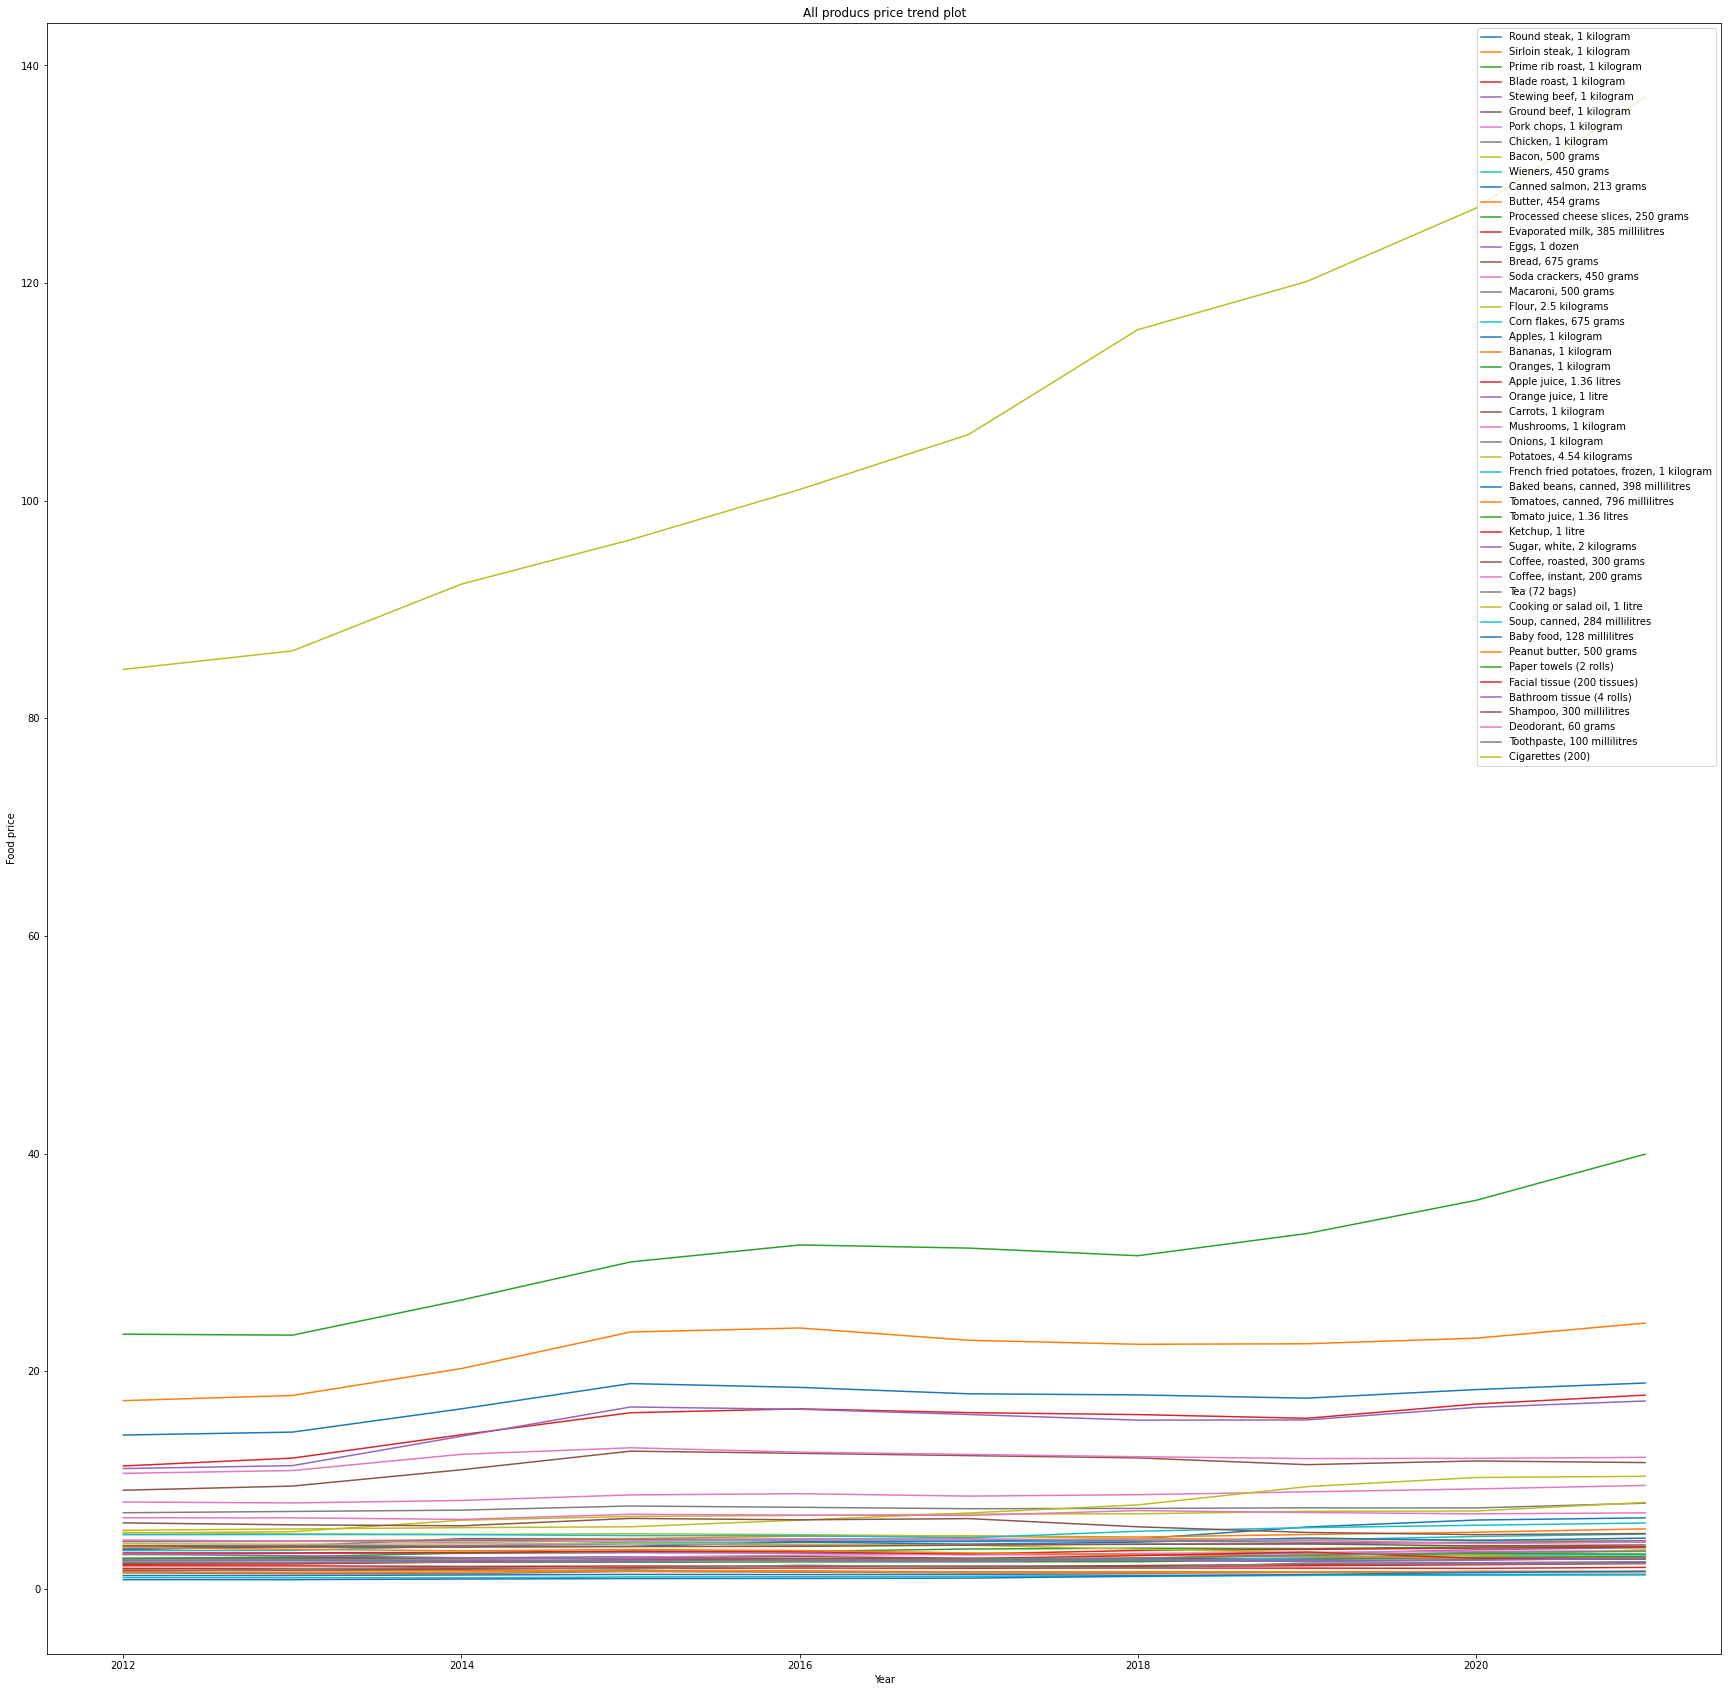

In [1355]:
import matplotlib.pyplot as plt
# With a DataFrame, pandas creates by default one line plot for each of the columns
df.plot(figsize=(30, 30))
plt.xlabel("Year")
plt.ylabel("Food price")
plt.title("All producs price trend plot")
plt.show()

In [1356]:
# plt.plot(df.index, df["Round steak, 1 kilogram"])
# plt.show()

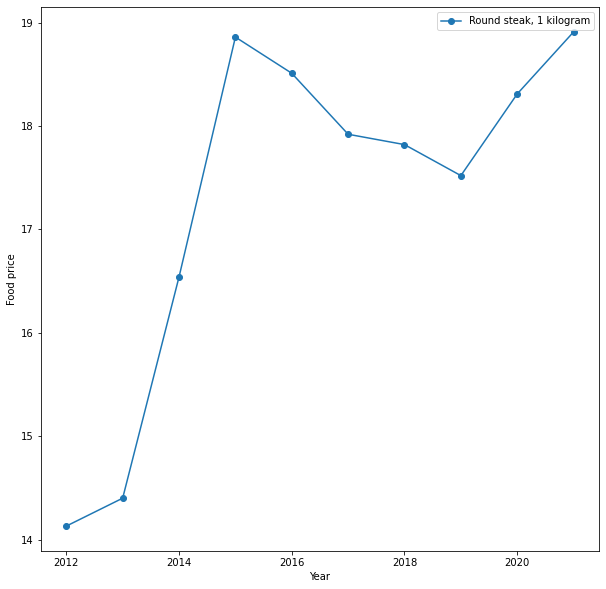

In [1357]:
# Plot one column
df["Round steak, 1 kilogram"].plot(figsize=(10, 10), marker="o")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Food price")

plt.show()

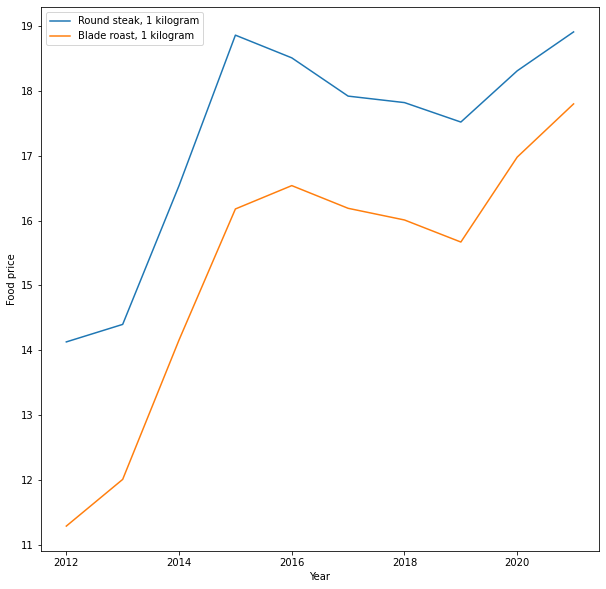

In [1358]:
# Plot multiple columns
df[["Round steak, 1 kilogram", "Blade roast, 1 kilogram"]].plot(figsize=(10, 10))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Food price")

plt.show()